In [8]:
# pyAPEP package import
import pyapep.isofit as isofit
import pyapep.simide as simide

# Data treatment package import
import numpy as np
import pandas as pd
import copy

# Data visualization package import
import matplotlib.pyplot as plt

parameters = {'axes.labelsize': 17,
              'xtick.labelsize': 16,
              'ytick.labelsize': 16,
          'axes.titlesize': 20}
plt.rcParams.update(parameters)
plt.rcParams['font.family'] = 'arial'

In [9]:
# Data import
# adsorbent 1
Data_zeo13 = pd.read_csv('Casestudy1_Zeolite13X.csv')
# adsorbent 2
Data_ac = pd.read_csv('Casestudy1_Activated_carbon.csv')
# adsorbent 3
Data_zeo5 = pd.read_csv('Casestudy1_Zeolite5A.csv')

Data = [Data_zeo13, Data_ac, Data_zeo5]

# Find best isotherm function, Ideal PSA simulation
Adsorbent = ['Zeolite13X','Activated_carbon', 'Zeolite5A']
iso_pure = []
err_list = []
for i in range(3):
    ads = Data[i]
    
    P_N2 = ads['Pressure_N2 (bar)'].dropna().values
    q_N2 = ads['Uptake_N2 (mol/kg)'].dropna().values

    P_H2 = ads['Pressure_H2 (bar)'].dropna().values
    q_H2 = ads['Uptake_H2 (mol/kg)'].dropna().values
    
    N2_iso, _, _, N2_err = isofit.best_isomodel(P_N2, q_N2)
    H2_iso, _, _, H2_err = isofit.best_isomodel(P_H2, q_H2)

    iso_pure.append([N2_iso, H2_iso])
    err_list.append([N2_err, H2_err])
    

In [21]:
y_N2 = np.array([0.1*i for i in range(1,10)])
y_H2 = 1-y_N2

results = []
for ph in range(2,60,2):
    P_feed = ph
    P_high = ph
    for i in range(3):
        iso_mix = iso_mix_list[i]
        
        CI1 = simide.IdealColumn(2, iso_mix )

        # Feed condition setting
        # P_feed = 8      # Feed presure (bar)
        T_feed = 293.15    # Feed temperature (K)
        y_feed = [1/4, 3/4] # Feed mole fraction (mol/mol)
        CI1.feedcond(P_feed, T_feed, y_feed)

        # Operating condition setting
        # P_high = 8 # High pressure (bar)
        P_low  = 1 # Low pressure (bar)
        CI1.opercond(P_high, P_low)

        # Simulation run
        x_tail = CI1.runideal()
        R = 1- (y_feed[0]*(1-x_tail[0]))/(x_tail[0]*(1-y_feed[0]))
        results.append(R*100)

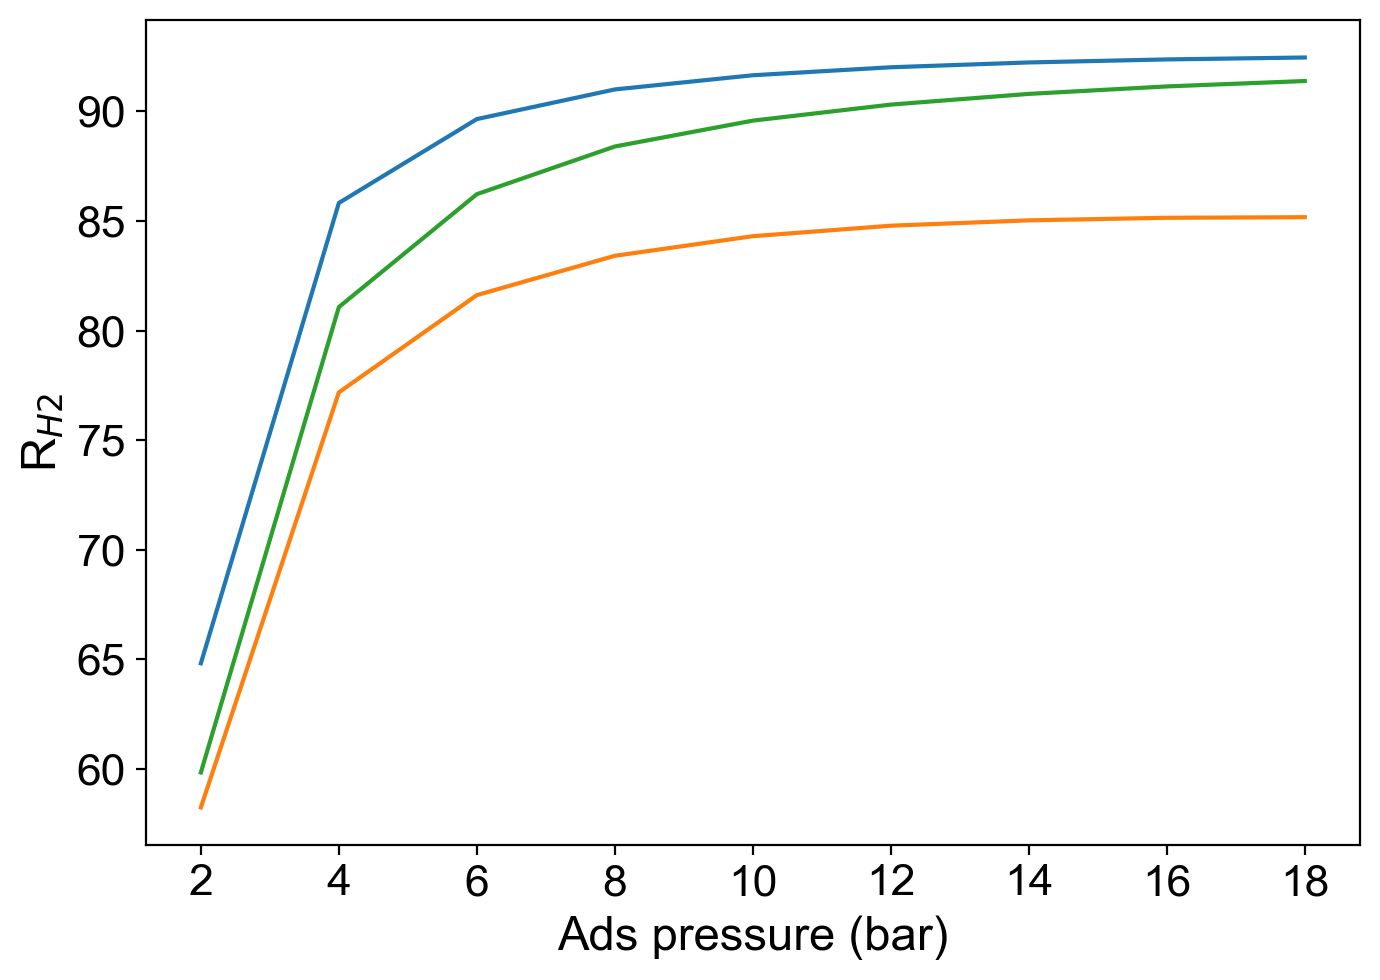

In [ ]:
plt.figure(dpi=200, figsize=(6,4))
for i in range(3):
    plt.plot(np.arange(2,60,2), results[i::3], label=Adsorbent[i])
plt.xlabel('Ads pressure (bar)')
plt.ylabel('R$_{H2}$')
plt.legend(loc='best', fontsize=16)
plt.tight_layout()
plt.show()

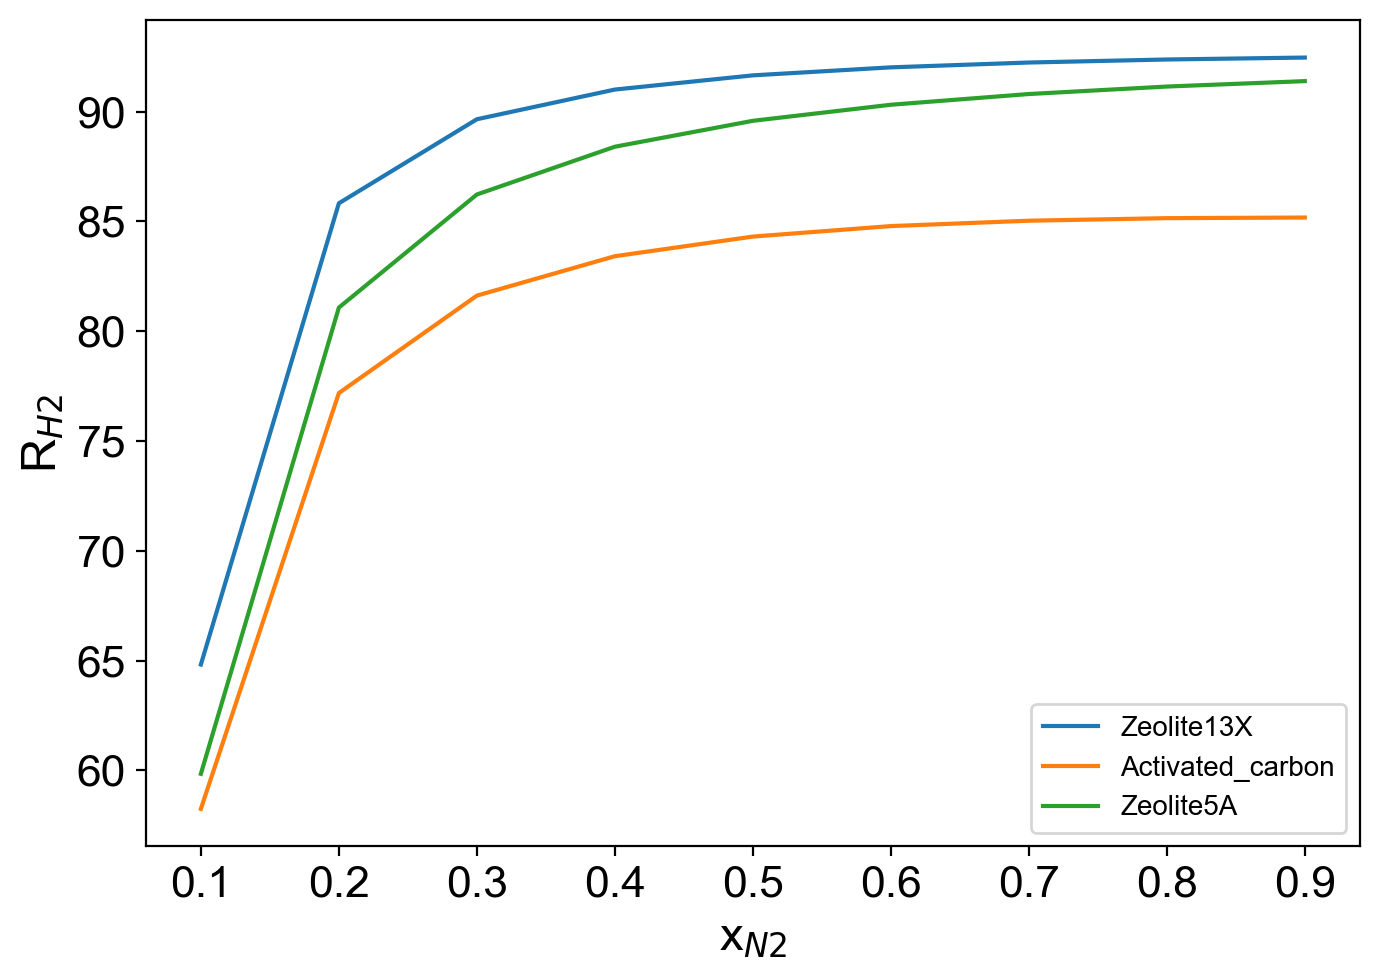

In [20]:
plt.figure(dpi=200, figsize=(6,4))
for i in range(3):
    plt.plot(y_N2, results[i::3], label=Adsorbent[i])
plt.xlabel('x$_{N2}$')
plt.ylabel('R$_{H2}$')
plt.legend(loc='best')
plt.tight_layout()
plt.show()